In [2]:
using FluidDynTools
using PotentialFlow
using ViscousFlow
using Plots

In [3]:
# grid cell size
Δx = 0.02

# set the size of a region in which to set up the flow.
xlim = (-2,2)
ylim = (-2,2)

# make the grid
g = PhysicalGrid(xlim,ylim,Δx)

PhysicalGrid{2}((210, 202), (105, 101), 0.02, ((-2.08, 2.08), (-2.0, 2.0)), 16)

In [4]:
cache = GridCache(g)
ψ = zeros_gridcurl(cache)
vel = zeros_gridgrad(cache);

In [5]:
zvort = ComplexF64[]
Γvort = Float64[]

Float64[]

In [6]:
push!(zvort,1.0+1.0im)
push!(Γvort,1.0)

1-element Vector{Float64}:
 1.0

In [7]:
push!(zvort,1.0-1.0im)
push!(Γvort,-1.0)

2-element Vector{Float64}:
  1.0
 -1.0

In [8]:
push!(zvort,-1.0-1.0im)
push!(Γvort,1.0)

3-element Vector{Float64}:
  1.0
 -1.0
  1.0

In [9]:
push!(zvort,-1.0+1.0im)
push!(Γvort,-1.0)

4-element Vector{Float64}:
  1.0
 -1.0
  1.0
 -1.0

In [10]:
v = Vortex.Point.(zvort,Γvort)

4-element Vector{PotentialFlow.Points.Point{Float64, Float64}}:
 Vortex.Point(1.0 + 1.0im, 1.0)
 Vortex.Point(1.0 - 1.0im, -1.0)
 Vortex.Point(-1.0 - 1.0im, 1.0)
 Vortex.Point(-1.0 + 1.0im, -1.0)

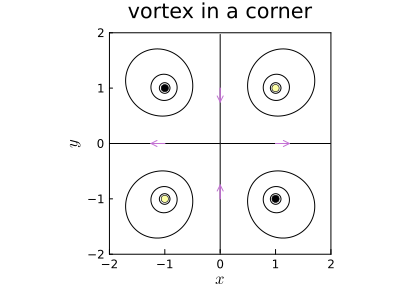

In [11]:
ViscousFlow.streamfunction!(ψ,v,cache)
p = plot(ψ,cache,color=:black,levels=range(-1,1,length=15),xlim=(-2,2),ylim=(-2,2),xlabel=L"x",ylabel=L"y",title="vortex in a corner",show=true)
plot!(p,v) ## This adds markers for the vortices

x = [-1, 0 ,0, 1]
y = [0, -1, 1, 0]
u0 = [-0.25, 0.0, 0.0,0.25]
v0 = [0, 0.25, -0.25,0]
quiver!(x,y,quiver=(u0,v0))
#savefig("hw2_p4.png")

In [13]:
z_eval = -1.0+0.0*im
induce_velocity(z_eval,v,0.0)

-0.25464790894703254 + 0.0im